In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

In [2]:
#pip install yfinance

In [3]:
#pip install plotly

In [4]:
end_date = datetime.now()
start_date = end_date - timedelta(days = 365)

In [5]:
AAPL_ticker = 'AAPL'
sp500_ticker = "^GSPC"    # S&P 500
nasdaq_ticker = "^IXIC"   # NASDAQ Composite
dow_ticker = "^DJI"  
data = yf.download(AAPL_ticker, start = start_date, end = end_date)
sp500_data = yf.download(sp500_ticker, start = start_date, end = end_date)
nasdaq_data = yf.download(nasdaq_ticker, start = start_date, end = end_date)
dow_data = yf.download(dow_ticker, start = start_date, end = end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
sp500_data.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2024-04-11,5199.060059,5211.779785,5138.770020,5172.950195,3509380000
2024-04-12,5123.410156,5175.029785,5107.939941,5171.509766,3963220000
2024-04-15,5061.819824,5168.430176,5052.470215,5149.669922,3950210000
2024-04-16,5051.410156,5079.839844,5039.830078,5064.589844,4006200000
2024-04-17,5022.209961,5077.959961,5007.250000,5068.970215,3596130000


In [7]:
my_columns = ['Close', 'High', 'Low', 'Open', 'Volume']
data.columns = my_columns
sp500_data.columns = my_columns
nasdaq_data.columns = my_columns
dow_data.columns = my_columns

In [8]:
import plotly.express as px

In [9]:
fig = px.line(x = data.index, y = data['Close'], title = "Stock Price for Apple")
fig.update_layout(xaxis_title = 'Date', yaxis_title = 'Price($)', yaxis_tickprefix = '$', xaxis = dict(
    dtick = 'M1',
    tickformat = "%b %Y"
))
fig.show()

In [10]:
fig_sp500 = px.line(x = sp500_data.index, y = sp500_data['Close'], title = "S&P 500")
fig_sp500.update_layout(xaxis_title = 'Date', yaxis_title = 'Price($)', yaxis_tickprefix = 'Points: ', xaxis = dict(
    dtick = 'M1',
    tickformat = "%b %Y"
))
fig_sp500.show()

In [11]:
fig_nasdaq = px.line(x = nasdaq_data.index, y = nasdaq_data['Close'], title = "Nasdaq")
fig_nasdaq.update_layout(xaxis_title = 'Date', yaxis_title = 'Price($)', yaxis_tickprefix = 'Points: ', xaxis = dict(
    dtick = 'M1',
    tickformat = "%b %Y"
))
fig_nasdaq.show()

In [12]:
fig_dow = px.line(x = dow_data.index, y = dow_data['Close'], title = "Dow Jones")
fig_dow.update_layout(xaxis_title = 'Date', yaxis_title = 'Price($)', yaxis_tickprefix = 'Points: ', xaxis = dict(
    dtick = 'M1',
    tickformat = "%b %Y"
))
fig_dow.show()

In [23]:
dow_data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2024-04-11,38459.078125,38598.980469,38197.281250,38523.261719,356640000
2024-04-12,37983.238281,38319.140625,37877.300781,38319.140625,440910000
2024-04-15,37735.109375,38386.808594,37657.789062,38075.378906,389170000
2024-04-16,37798.968750,37992.218750,37713.699219,37992.218750,339480000
2024-04-17,37753.308594,38036.699219,37611.558594,37949.671875,314650000


In [14]:
fig_sp500 = px.line(x = sp500_data.index[-30:], y = sp500_data['Close'][-30:], title = "S&P 500")
fig_sp500.update_layout(xaxis_title = 'Date', yaxis_title = 'Price($)', yaxis_tickprefix = 'Points: ', xaxis = dict(
    nticks = 14,
    tickformat = "%m/%d"
))
fig_sp500.show()

In [18]:
sp500_df_col = ['Close']

In [21]:
sp500_df = sp500_data['Close']

In [22]:
sp500_df.head()

Date
2024-04-11    5199.060059
2024-04-12    5123.410156
2024-04-15    5061.819824
2024-04-16    5051.410156
2024-04-17    5022.209961
Name: Close, dtype: float64

In [25]:
start_date = '2024-04-11'
end_date = '2025-04-04'
sp500_df = sp500_df[start_date: end_date]

In [26]:
import pymannkendall as mk
trend_result = mk.original_test(sp500_df)

In [27]:
trend_result

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=14.739573584825974, Tau=0.6297027747605412, s=19131.0, var_s=1684457.6666666667, slope=4.070794356496711, intercept=5166.852352744654)

### trend = 'increasing' and h = True, so Trend exists

In [28]:
first_diff_sp500 = sp500_df.diff()[1:]

In [29]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Points')

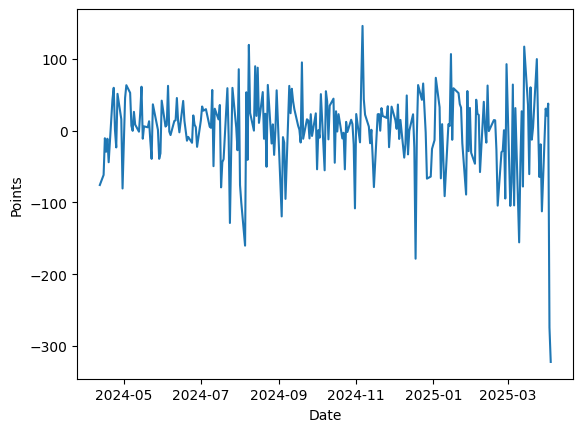

In [30]:
plt.plot(first_diff_sp500)
plt.xlabel("Date")
plt.ylabel("Points")

In [32]:
trend_result = mk.original_test(first_diff_sp500)
trend_result

Mann_Kendall_Test(trend='no trend', h=False, p=0.2871769155295034, z=-1.0643351158184262, Tau=-0.04559482329517173, s=-1374.0, var_s=1664118.6666666667, slope=-0.04254748774509804, intercept=10.94717467064951)

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

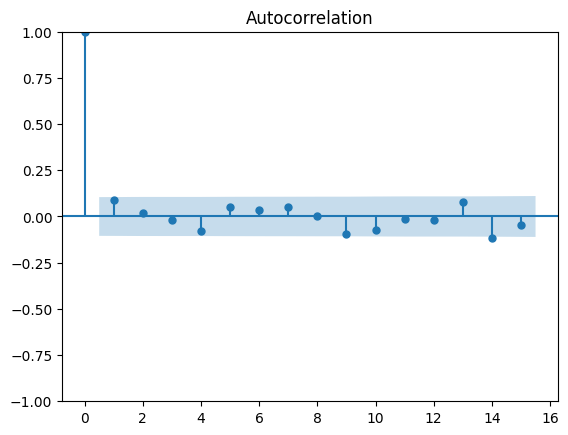

In [43]:
acf_val = plot_acf(first_diff_sp500, lags = 15, alpha = 0.1)


/Users/amitmishra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



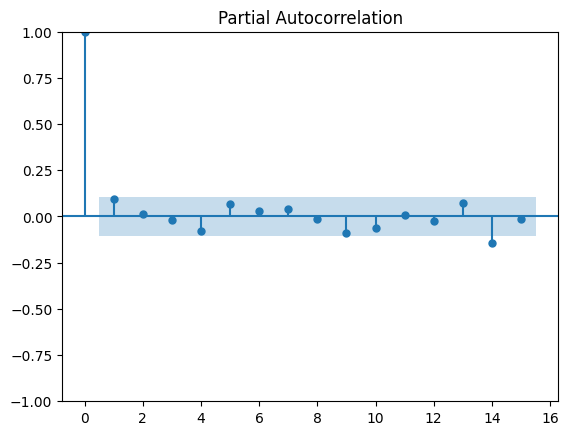

In [44]:
pacf_val = plot_pacf(first_diff_sp500, lags = 15, alpha = 0.1)


In [45]:
train_end = datetime(2025,1,1)
test_end = datetime(2025,4,10)

train_data = sp500_df[:train_end]
test_data = sp500_df[train_end + timedelta(days=1): test_end]

In [46]:
#Fit SARIMA Model

In [47]:
my_order = (0,1,0)
my_seasonal_order = (1,0,1,5)

#Use 5 and 21 for weekly and monthly seasonality (no. of trading days a week and month)

In [50]:
model1 = SARIMAX(train_data, order = my_order, seasonal_order=my_seasonal_order).fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.20950D+00    |proj g|=  1.21328D-02

At iterate    5    f=  5.20821D+00    |proj g|=  9.29616D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   3.482D-06   5.208D+00
  F =   5.2081025370156171     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/amitmishra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/amitmishra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.


In [51]:
#making predictions